In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cmcrameri import cm

import timeit

In [2]:
file_path = 'data/'




# Read the data from the file
with open(file_path, 'r') as file:
    data = file.read()

# Convert the string to a list of numbers
numbers = np.fromstring(data, sep=' ')

# Reshape the data into a 2D array
num_columns = 13
all_data = numbers.reshape(-1, num_columns)

In [3]:
id_WD = [10, 11, 12]
id_BH = [14]

check_WDBH = ((np.isin(all_data[:, 10], id_BH) & np.isin(all_data[:, 11], id_WD)) |
             (np.isin(all_data[:, 11], id_BH) & np.isin(all_data[:, 10], id_WD)))

events_WDBH = all_data[check_WDBH]

Text(0.5, 1.0, 'WD mass vs BH mass')

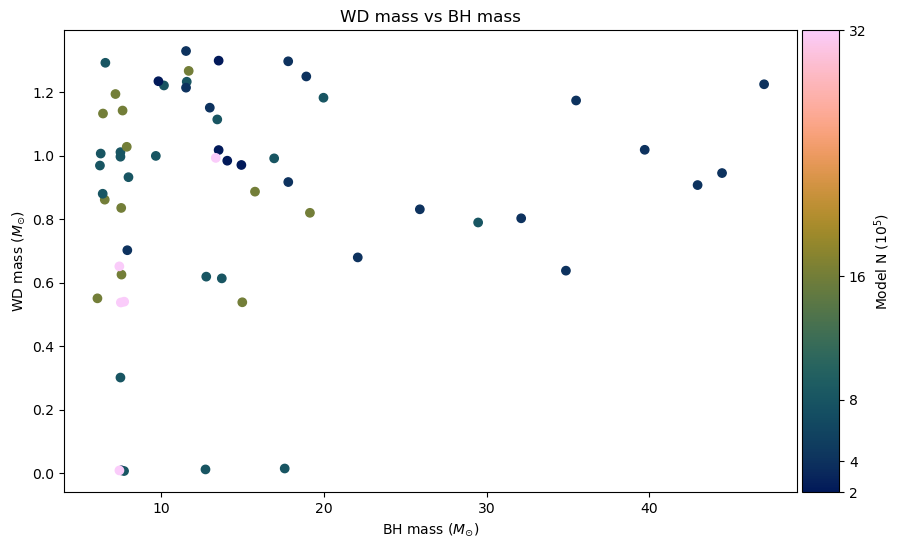

In [4]:
mass_BH = [coll[8] if coll[10] in id_BH else coll[9] for coll in events_WDBH]
mass_WD = [coll[8] if coll[10] in id_WD else coll[9] for coll in events_WDBH]
Ns_WDBH = events_WDBH[::, 4]


fig, ax = plt.subplots(figsize=(10, 6))

divider = make_axes_locatable(ax)

cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.scatter(mass_BH, mass_WD, c=Ns_WDBH, cmap=cm.batlow)

cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[2, 4, 8, 16, 32])
cbar.ax.set_yticklabels(['2', '4', '8', '16', '32'])
cbar.set_label(r'Model N ($10^5$)')

ax.set_xlabel(r'BH mass ($M_{\odot}$)')
ax.set_ylabel(r'WD mass ($M_{\odot}$)')
ax.set_title('WD mass vs BH mass')

C:\Users\willi\AppData\Local\Temp\ipykernel_63076\1160028985.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles.append(ax.scatter([], [], c=color, label=label))


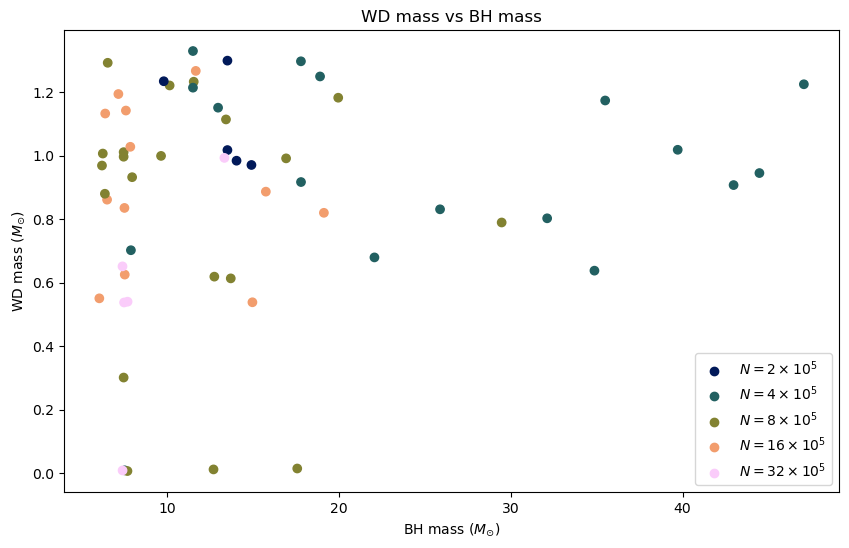

In [5]:
mass_BH = [coll[8] if coll[10] in id_BH else coll[9] for coll in events_WDBH]
mass_WD = [coll[8] if coll[10] in id_WD else coll[9] for coll in events_WDBH]
Ns_WDBH = events_WDBH[::, 4]

markers = ["*", "o", "x"] # change markers for the different metallicity values


colors = cm.batlow(np.linspace(0, 1, len(set(Ns_WDBH))))

# Get unique numbers from the list
unique_numbers = list(set(Ns_WDBH))
unique_numbers.sort()

# Create a mapping of unique numbers to colors
N_to_color = {num: colors[i % len(colors)] for i, num in enumerate(unique_numbers)}
colors_N = [N_to_color[N] for N in Ns_WDBH]


fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(mass_BH, mass_WD, c=colors_N)
ax.set_xlabel(r'BH mass ($M_{\odot}$)')
ax.set_ylabel(r'WD mass ($M_{\odot}$)')
ax.set_title('WD mass vs BH mass')

# Create a legend
legend_labels = {N: rf'$N={int(N)} \times 10^5$' for N in unique_numbers}
legend_handles = []
for N in unique_numbers:
    label = legend_labels[N]
    color = N_to_color[N]
    legend_handles.append(ax.scatter([], [], c=color, label=label))
ax.legend(handles=legend_handles, loc='best')

Text(0.5, 1.0, 'WD mass vs BH mass')

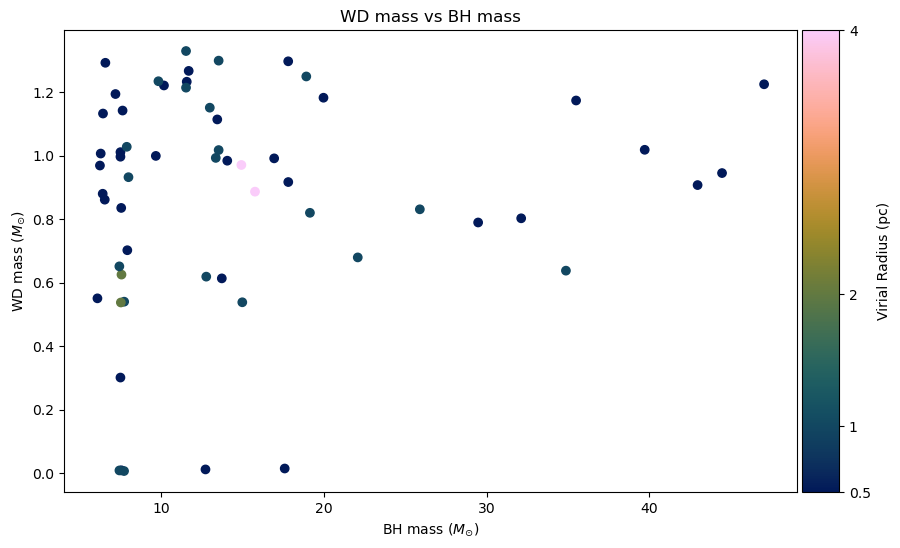

In [6]:
vrads_WDBH = events_WDBH[::, 1]


fig, ax = plt.subplots(figsize=(10, 6))

divider = make_axes_locatable(ax)

cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.scatter(mass_BH, mass_WD, c=vrads_WDBH, cmap=cm.batlow)

cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[0.5, 1, 2, 4])
cbar.ax.set_yticklabels(['0.5', '1', '2', '4'])
cbar.set_label(r'Virial Radius (pc)')

ax.set_xlabel(r'BH mass ($M_{\odot}$)')
ax.set_ylabel(r'WD mass ($M_{\odot}$)')
ax.set_title('WD mass vs BH mass')

C:\Users\willi\AppData\Local\Temp\ipykernel_63076\4183163193.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles.append(ax.scatter([], [], c=color, label=label))


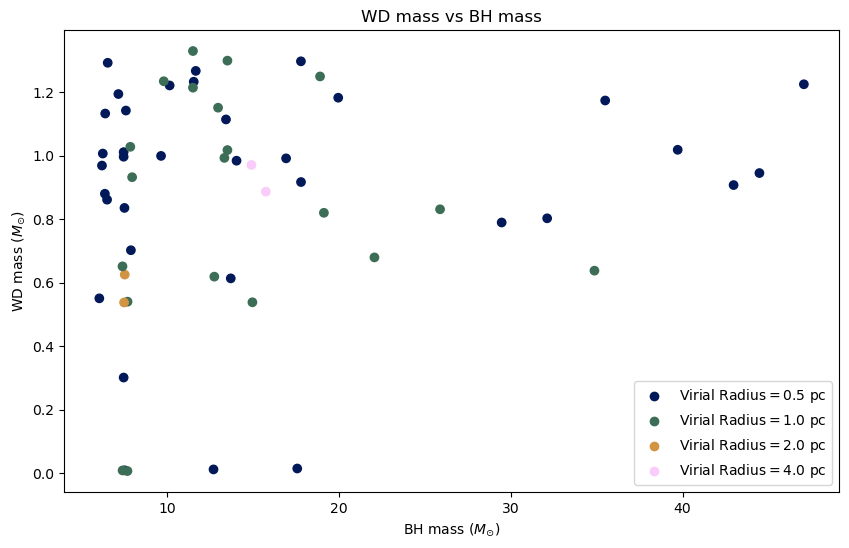

In [7]:
vrads_WDBH = events_WDBH[::, 1]


colors = cm.batlow(np.linspace(0, 1, len(set(vrads_WDBH))))

# Get unique numbers from the list
unique_numbers = list(set(vrads_WDBH))
unique_numbers.sort()

# Create a mapping of unique numbers to colors
vrads_to_color = {num: colors[i % len(colors)] for i, num in enumerate(unique_numbers)}
colors_vrads = [vrads_to_color[vrad] for vrad in vrads_WDBH]


fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(mass_BH, mass_WD, c=colors_vrads)
ax.set_xlabel(r'BH mass ($M_{\odot}$)')
ax.set_ylabel(r'WD mass ($M_{\odot}$)')
ax.set_title('WD mass vs BH mass')

# Create a legend
legend_labels = {vrad: rf'Virial Radius$={vrad}$ pc' for vrad in unique_numbers}
legend_handles = []
for vrad in unique_numbers:
    label = legend_labels[vrad]
    color = vrads_to_color[vrad]
    legend_handles.append(ax.scatter([], [], c=color, label=label))
ax.legend(handles=legend_handles, loc='best')

Text(0.5, 1.0, 'Collisions vs Density for WDBH collisions')

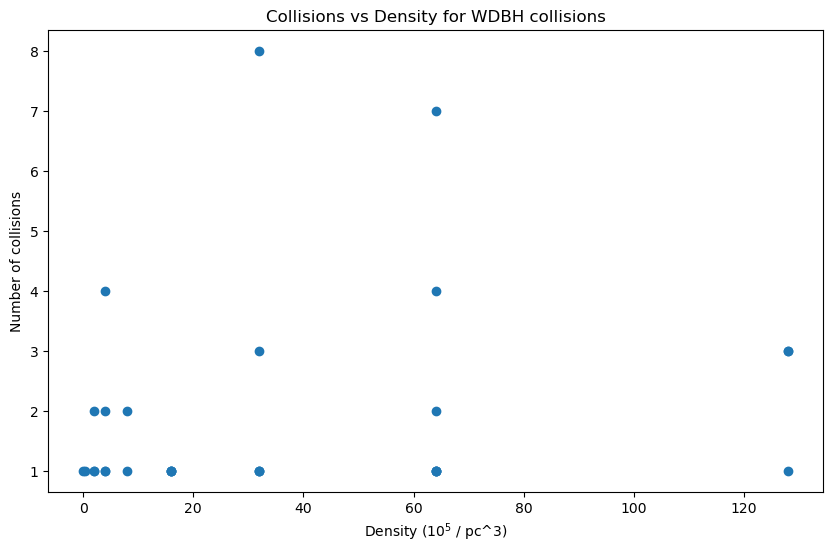

In [8]:
# make dictionary of number of collisions for each id number
id_nos_WDBH = {}
for event in events_WDBH:
    id_no = event[0]
    if id_no in id_nos_WDBH:
        id_nos_WDBH[id_no] += 1
    else:
        id_nos_WDBH[id_no] = 1

# make dictionary of volume density for each id number
id_rho_WDBH = {}
for event in events_WDBH:
    id_no = event[0]
    rho = event[4] / event[1]**3
    id_rho_WDBH[id_no] = rho


no = np.array([[id_nos_WDBH[key], id_rho_WDBH[key]] for key in id_nos_WDBH]).T[0]
rho = np.array([[id_nos_WDBH[key], id_rho_WDBH[key]] for key in id_nos_WDBH]).T[1]


fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(rho, no)
ax.set_ylabel('Number of collisions')
ax.set_xlabel(r'Density ($10^5$ / pc^3)')
ax.set_title('Collisions vs Density for WDBH collisions')


C:\Users\willi\AppData\Local\Temp\ipykernel_63076\2448194529.py:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles.append(ax.scatter([], [], c=color, label=label))


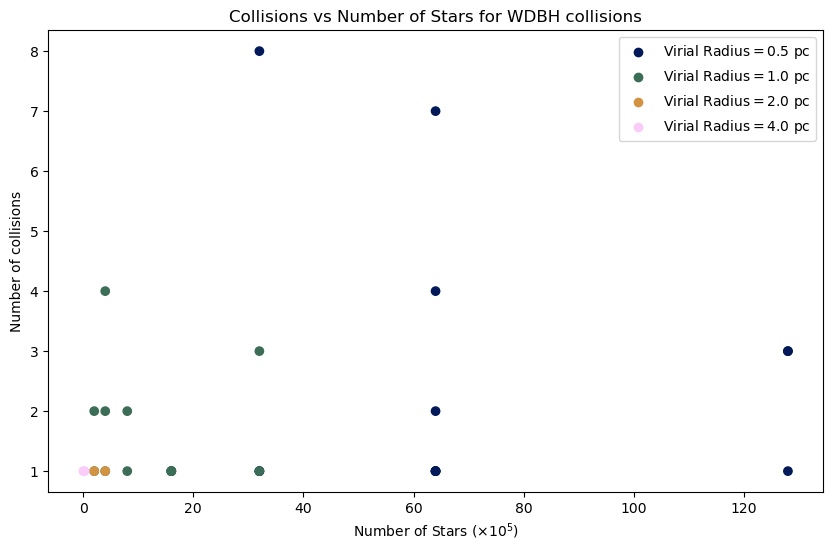

In [9]:
# Make dictionary of number of collisions for each id number
id_nos_WDBH = {}
for event in events_WDBH:
    id_no = event[0]
    if id_no in id_nos_WDBH:
        id_nos_WDBH[id_no] += 1
    else:
        id_nos_WDBH[id_no] = 1


# Make dictionary of N for each id number
id_rho_WDBH = {}
for event in events_WDBH:
    id_no = event[0]
    Ns_WDBH = event[4]
    id_rho_WDBH[id_no] = Ns_WDBH


# Make dictionary of vrad for each id number
id_vrad_WDBH = {}
for event in events_WDBH:
    id_no = event[0]
    vrad_WDBH = event[1]
    id_vrad_WDBH[id_no] = vrad_WDBH

# Assembling dictionaries into lists
combined_list = np.array([[id_nos_WDBH[key], id_rho_WDBH[key], id_vrad_WDBH[key]] for key in id_nos_WDBH]).T

no = combined_list[0]
Ns = combined_list[1]
vrads = combined_list[2]

# Subdivide colourmap
colors = cm.batlow(np.linspace(0, 1, len(set(vrads))))

# Get unique numbers from the list
unique_numbers = list(set(vrads))
unique_numbers.sort()

# Create a mapping of unique numbers to colors
vrads_to_color = {num: colors[i % len(colors)] for i, num in enumerate(unique_numbers)}
colors_vrads = [vrads_to_color[vrad] for vrad in vrads]


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(rho, no, c=colors_vrads)
ax.set_ylabel('Number of collisions')
ax.set_xlabel(r'Number of Stars ($\times 10^5$)')
ax.set_title('Collisions vs Number of Stars for WDBH collisions')

# Create a legend
legend_labels = {vrad: rf'Virial Radius$={vrad}$ pc' for vrad in unique_numbers}
legend_handles = []
for vrad in unique_numbers:
    label = legend_labels[vrad]
    color = vrads_to_color[vrad]
    legend_handles.append(ax.scatter([], [], c=color, label=label))
ax.legend(handles=legend_handles, loc='best')

Text(0.5, 1.0, 'Cumulative collisions over time for WDBH collisions')

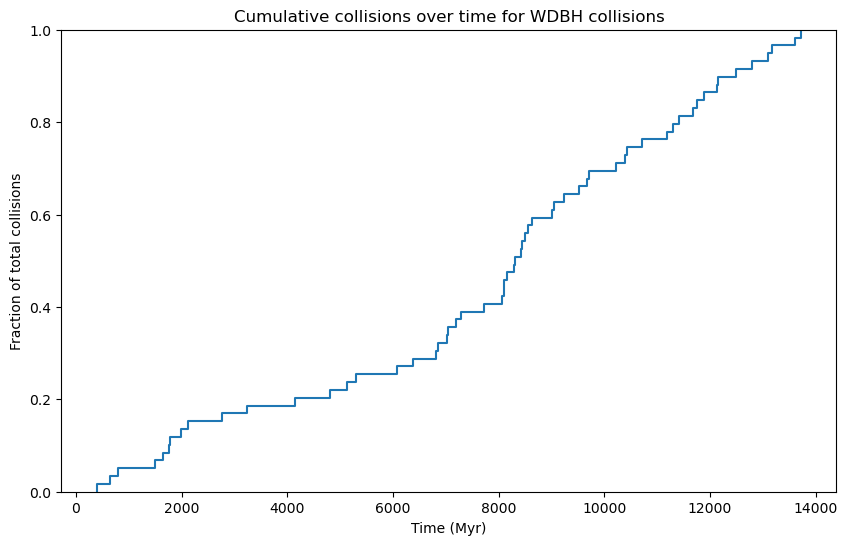

In [10]:
times_WDBH = events_WDBH[::, 5]


fig, ax = plt.subplots(figsize=(10, 6))

ax.ecdf(times_WDBH)
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Fraction of total collisions')
ax.set_title('Cumulative collisions over time for WDBH collisions')


Text(0.5, 1.0, 'Collisions vs Metallicity for WDBH collisions')

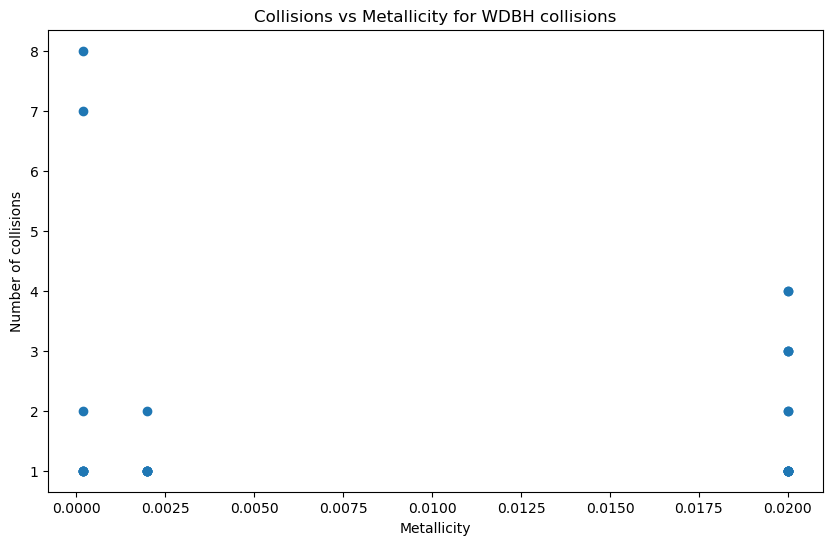

In [11]:
# make dictionary of number of collisions for each id number
id_nos_WDBH = {}
for event in events_WDBH:
    id_no = event[0]
    if id_no in id_nos_WDBH:
        id_nos_WDBH[id_no] += 1
    else:
        id_nos_WDBH[id_no] = 1


# make dictionary of volume density for each id number
id_Z_WDBH = {}
for event in events_WDBH:
    id_no = event[0]
    Z = event[3]
    id_Z_WDBH[id_no] = Z


no = np.array([[id_nos_WDBH[key], id_Z_WDBH[key]] for key in id_nos_WDBH]).T[0]
Z = np.array([[id_nos_WDBH[key], id_Z_WDBH[key]] for key in id_nos_WDBH]).T[1]


fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(Z, no)#, c=colors_vrads)
ax.set_ylabel('Number of collisions')
ax.set_xlabel(r'Metallicity')
ax.set_title('Collisions vs Metallicity for WDBH collisions')
